# Relatório de análise VIII

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

## Identificando e removendo outliers

In [2]:
dados = pd.read_csv('dados/aluguel_residencial_tratado.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


<img  align="left" src="compressed_box-plot.png" alt="boxplot" width="400"/>

É possível identificar os *outliers* por diferentes métodos além do que será usando na aula, o **boxplot**. Para esse cálculo, primeiro é obtida a **Amplitude Interquartil (AIQ)**, que resulta da diferença entre o 3o e 1o quartis.

$ AIQ = Q_3 - Q_1 $

Os *outliers* podem ser classificados entre ***outliers* moderados** e ***outliers* extremos**. Os **moderados** são representados por $X^o$ e são determinados por estarem entre os seus limites ($Q_1 - 1.5 * AIQ$ e $Q_3 + 1.5 * AIQ$) e os limites de dos extremos ($Q_1 - 3 * AIQ$ e $Q_3 + 3 * AIQ$).

Já os **extremos** são os valores abaixo de $Q_1 - 3 * AIQ$ ou acima de $Q_3 + 3 * AIQ$.

*(informações retiradas do livro do Fávero e Belfiore, Manual de análise de dados*

Vamos, então, aplicar essa análise no nosso banco de dados.

<AxesSubplot:>

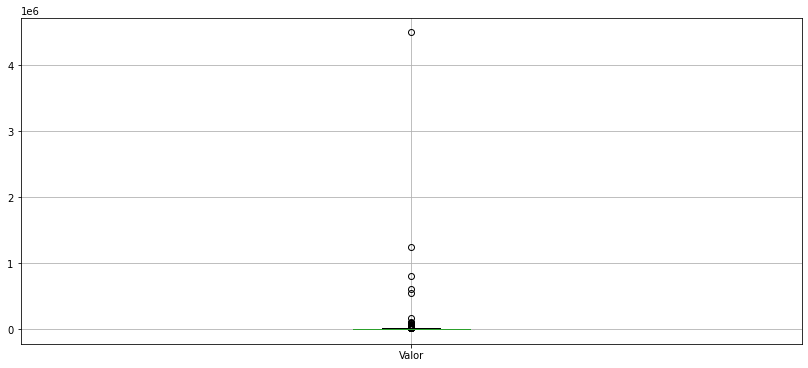

In [3]:
# visualizando o boxplot
dados.boxplot(['Valor'])

In [7]:
# obtendo os valores dos quartis
valor = dados.Valor
Q1 = valor.quantile(0.25)
Q3 = valor.quantile(0.75)

AIQ = Q3 - Q1

lim_inf = Q1 - 1.5 * AIQ
lim_sup = Q3 + 1.5 * AIQ

In [9]:
# removendo os outliers (moderados e extremos)
selecao = (valor >= lim_inf) & (valor <= lim_sup)
dados_new = dados[selecao]

<AxesSubplot:>

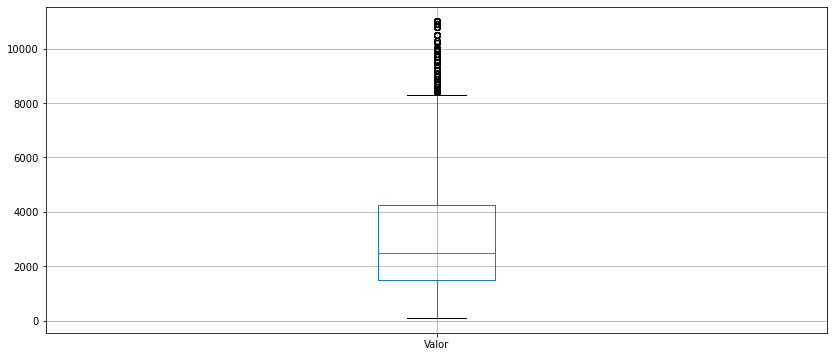

In [12]:
dados_new.boxplot('Valor')

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

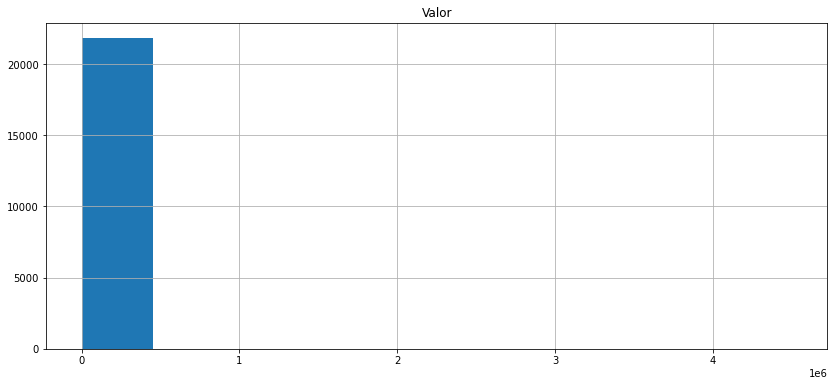

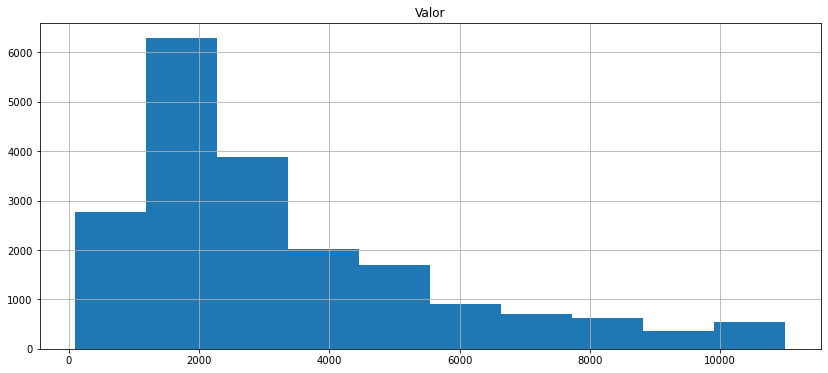

In [13]:
# comparando as distribuições
dados.hist('Valor')
dados_new.hist('Valor')

## Identificando e removendo *outliers* por grupo

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

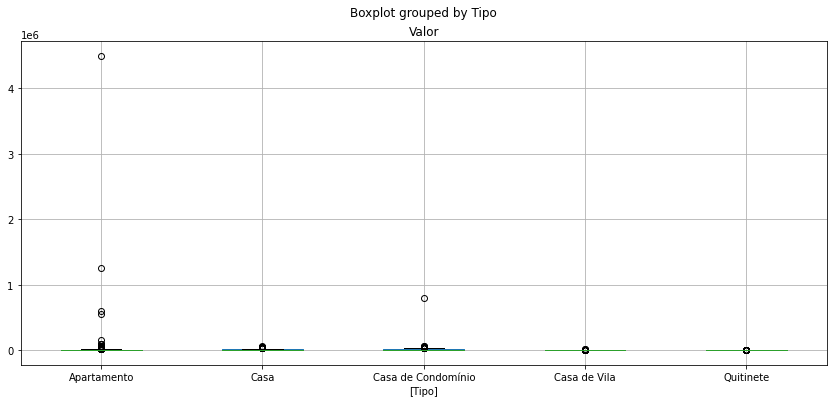

In [17]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [23]:
grupo_tipo = dados.groupby('Tipo')
# já estamos selecionando uma variável para olhar

In [24]:
Q1 = grupo_tipo.Valor.quantile(0.25)
Q3 = grupo_tipo.Valor.quantile(0.75)

AIQ = Q3 - Q1

lim_inf = Q1 - 1.5 * AIQ
lim_sup = Q3 + 1.5 * AIQ

# visualizando os resultados
pd.DataFrame({'Q1': Q1, 'Q3': Q3, 'AIQ': AIQ, 'lim_inf': lim_inf, 'lim_sup': lim_sup})

,Q1,Q3,AIQ,lim_inf,lim_sup
Tipo,,,,,
Apartamento,1700.0,5000.0,3300.0,-3250.0,9950.0
Casa,1100.0,9800.0,8700.0,-11950.0,22850.0
Casa de Condomínio,4000.0,15250.0,11250.0,-12875.0,32125.0
Casa de Vila,750.0,1800.0,1050.0,-825.0,3375.0
Quitinete,900.0,1500.0,600.0,0.0,2400.0


In [63]:
dados_new = pd.DataFrame()
for tipo, df in grupo_tipo:
    selecao = (df.Valor >= lim_inf[tipo]) & (df.Valor <= lim_sup[tipo])
    dados_new = pd.concat([dados_new, df[selecao]])

dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo Agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21687,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
21728,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
21748,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
21815,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


In [49]:
## código usado na aula
#for tipo in grupo_tipo.groups.keys():
#    eh_tipo = dados['Tipo'] == tipo
#    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
#    selecao = eh_tipo & eh_dentro_limite
#    dados[selecao]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo Agregado


<AxesSubplot:title={'center':'Valor'}, xlabel='Tipo'>

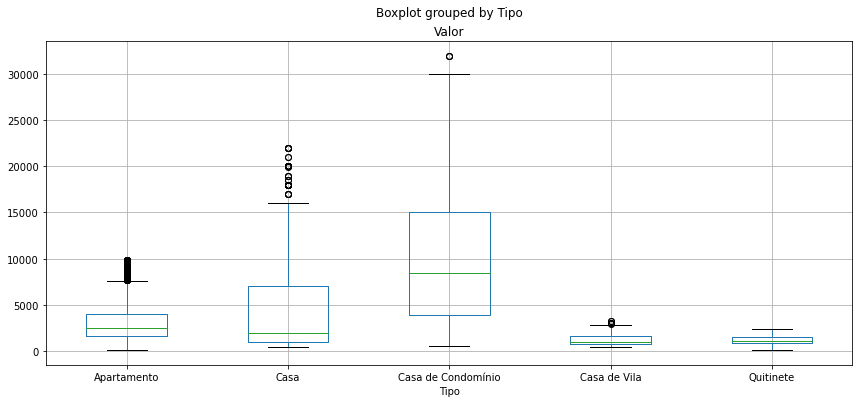

In [65]:
# verificando o boxplot sem os outliers
dados_new.boxplot(['Valor'], by = 'Tipo')

In [66]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv',
                sep = ';', index = False)

### Segmentando mais para a remoção dos *outliers*

Em outras análises, verificamos que há também diferenças nos valores de aluguel por bairro. Além disso, sabe-se que este valor pode ser afetado pelo tamanho do imóvel. Portanto, para explorar ainda mais os dados e reforçar a análise de *outliers*, vamos trabalhar com o agrupamento considerando `Tipo` e `Bairro` e avaliar os *outliers* pela variável de `Valor m2`.

In [69]:
grupo = dados.groupby(by = ['Tipo', 'Bairro'])

Novamente, vamos processar os limites inferiores e superiores.

In [70]:
Q1 = grupo.Valor_m2.quantile(.25)
Q3 = grupo.Valor_m2.quantile(.75)
AIQ = Q3 - Q1
lim_inf = Q1 - 1.5 * AIQ
lim_sup = Q3 + 1.5 * AIQ

In [99]:
dados_nw = pd.DataFrame()

for grupos, df in grupo:
    selecao = (df.Valor_m2 >= lim_inf[grupos]) & (df.Valor_m2 <= lim_sup[grupos])
    dados_nw = pd.concat([dados_nw, df[selecao]])
dados_nw # note que perdemos menos variáveis
# o único porém, é que podemos ter apenas uma observação para o agrupamento analisadob

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo Agregado
6951,Apartamento,Abolição,2,1,0,65,1300.0,280.0,0.0,20.00,Apartamento
7634,Apartamento,Abolição,2,0,0,50,1000.0,250.0,0.0,20.00,Apartamento
14187,Apartamento,Abolição,2,0,0,43,800.0,341.0,14.0,18.60,Apartamento
16054,Apartamento,Abolição,2,1,0,44,900.0,560.0,15.0,20.45,Apartamento
18797,Apartamento,Abolição,2,0,0,48,900.0,300.0,13.0,18.75,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
3596,Quitinete,Vila da Penha,1,0,0,20,450.0,0.0,0.0,22.50,Apartamento
9075,Quitinete,Vila da Penha,1,0,0,30,650.0,0.0,0.0,21.67,Apartamento
10456,Quitinete,Vila da Penha,1,0,0,25,550.0,0.0,0.0,22.00,Apartamento
14422,Quitinete,Vila da Penha,1,0,0,25,750.0,100.0,0.0,30.00,Apartamento


## Matplotlib

In [115]:
dados = pd.read_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


In [116]:
area = plt.figure()

<Figure size 1008x432 with 0 Axes>

In [117]:
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [118]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor x Area')

g2.hist(dados.Valor)
g2.set_title('Histograma de valor de aluguel')

dados_g3 = dados.Valor.sample(100) # seleciona aleatoriamente algumas observações
dados_g3.index = range(len(dados_g3))
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor médio por tipo')

Text(0.5, 1.0, 'Valor médio por tipo')

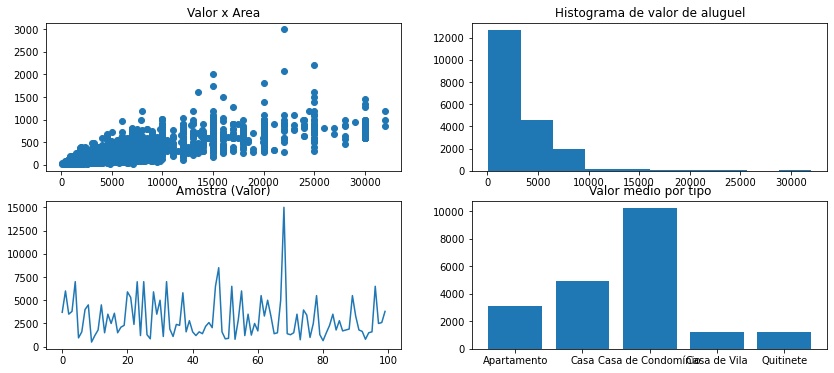

In [119]:
area

In [120]:
area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')
area = '' # sempre é bom zerar o gráfico depois de plotar

Nesta aula, aprendemos:

 * Como identificar e remover outliers com o box plot
 * Como fazer um gráfico de pizza com a aplicação do método `pie()`, da biblioteca matplotlib